In [71]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset History
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

##STEP-1 Read and describe the data sheet 

In [72]:
data = pd.read_csv("train2.csv",index_col = 0)
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Sr.No,,,,,,,,,,,,
1,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
3,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
5,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550064,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550065,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550066,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137


In [73]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [74]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [75]:
data.shape

(550068, 12)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550068 entries, 1 to 550068
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 54.6+ MB


In [77]:
data ['Product_ID'] = pd.to_numeric(data['Product_ID'],errors= 'coerce')
data ['Gender']=data['Gender'].astype('category')
data ['City_Category']=data['City_Category'].astype('category')
data ['Stay_In_Current_City_Years']=pd.to_numeric(data['Stay_In_Current_City_Years'],errors='coerce')

In [78]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Sr.No,,,,,,,,,,,,
1,1000001,NaN,F,0-17,10,A,2.0,0,3,NaN,NaN,8370
2,1000001,NaN,F,0-17,10,A,2.0,0,1,6.0,14.0,15200
3,1000001,NaN,F,0-17,10,A,2.0,0,12,NaN,NaN,1422
4,1000001,NaN,F,0-17,10,A,2.0,0,12,14.0,NaN,1057
5,1000002,NaN,M,55+,16,C,NaN,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550064,1006033,NaN,M,51-55,13,B,1.0,1,20,NaN,NaN,368
550065,1006035,NaN,F,26-35,1,C,3.0,0,20,NaN,NaN,371
550066,1006036,NaN,F,26-35,15,B,NaN,1,20,NaN,NaN,137


In [79]:
data.duplicated()

Sr.No
1         False
2         False
3         False
4         False
5         False
          ...  
550064    False
550065    False
550066    False
550067    False
550068    False
Length: 550068, dtype: bool

In [80]:
data[data.duplicated()].shape

(2543, 12)

#STEP-2 cleaning of data

In [92]:
#drop Product_ID column : not contributing to the data set
dr=data.drop({'Product_ID','User_ID'},axis=1)


In [93]:
dr

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Sr.No,,,,,,,,,,
1,F,0-17,10,A,2.0,0,3,NaN,NaN,8370
2,F,0-17,10,A,2.0,0,1,6.0,14.0,15200
3,F,0-17,10,A,2.0,0,12,NaN,NaN,1422
4,F,0-17,10,A,2.0,0,12,14.0,NaN,1057
5,M,55+,16,C,NaN,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550064,M,51-55,13,B,1.0,1,20,NaN,NaN,368
550065,F,26-35,1,C,3.0,0,20,NaN,NaN,371
550066,F,26-35,15,B,NaN,1,20,NaN,NaN,137


In [94]:
dr1 = dr.rename({'Stay_In_Current_City_Years':'City Years' , 'Product_Category_1':'P1' , 'Product_Category_2':'P2' , 'Product_Category_3':'P3'},axis=1)

In [95]:
dr1.head()

,Gender,Age,Occupation,City_Category,City Years,Marital_Status,P1,P2,P3,Purchase
Sr.No,,,,,,,,,,
1,F,0-17,10,A,2.0,0,3,NaN,NaN,8370
2,F,0-17,10,A,2.0,0,1,6.0,14.0,15200
3,F,0-17,10,A,2.0,0,12,NaN,NaN,1422
4,F,0-17,10,A,2.0,0,12,14.0,NaN,1057
5,M,55+,16,C,NaN,0,8,NaN,NaN,7969


In [96]:
dr1.dtypes

Gender            category
Age                 object
Occupation           int64
City_Category     category
City Years         float64
Marital_Status       int64
P1                   int64
P2                 float64
P3                 float64
Purchase             int64
dtype: object

In [97]:
dr1.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [98]:
dr1['Age']= dr1['Age'].map({'0-17':'Tin','18-25':'Adlt','26-35':'Adlt','36-45':'Midage','46-50':'Midage','51-55':'Old','55+':'Old'})

In [99]:
dr1

,Gender,Age,Occupation,City_Category,City Years,Marital_Status,P1,P2,P3,Purchase
Sr.No,,,,,,,,,,
1,F,Tin,10,A,2.0,0,3,NaN,NaN,8370
2,F,Tin,10,A,2.0,0,1,6.0,14.0,15200
3,F,Tin,10,A,2.0,0,12,NaN,NaN,1422
4,F,Tin,10,A,2.0,0,12,14.0,NaN,1057
5,M,Old,16,C,NaN,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550064,M,Old,13,B,1.0,1,20,NaN,NaN,368
550065,F,Adlt,1,C,3.0,0,20,NaN,NaN,371
550066,F,Adlt,15,B,NaN,1,20,NaN,NaN,137


In [100]:
dr1_Age=dr1.groupby(['Age'])

In [101]:
dr1_Age.head()

,Gender,Age,Occupation,City_Category,City Years,Marital_Status,P1,P2,P3,Purchase
Sr.No,,,,,,,,,,
1,F,Tin,10,A,2.0,0,3,NaN,NaN,8370
2,F,Tin,10,A,2.0,0,1,6.0,14.0,15200
3,F,Tin,10,A,2.0,0,12,NaN,NaN,1422
4,F,Tin,10,A,2.0,0,12,14.0,NaN,1057
5,M,Old,16,C,NaN,0,8,NaN,NaN,7969
6,M,Adlt,15,A,3.0,0,1,2.0,NaN,15227
7,M,Midage,7,B,2.0,1,1,8.0,17.0,19215
8,M,Midage,7,B,2.0,1,1,15.0,NaN,15854
9,M,Midage,7,B,2.0,1,1,16.0,NaN,15686


#Step-3 Visualization of data: Detect Outliers 

In [102]:
dr1['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [104]:
dr1['Purchase'].kurtosis()

-0.3383775655851702

In [105]:
dr1['Purchase'].skew()

0.6001400037087128

<Axes: >

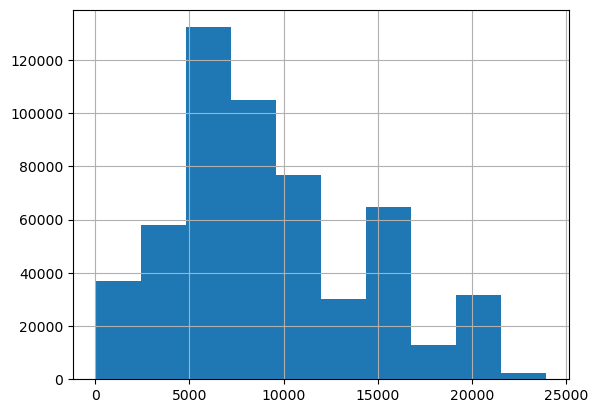

In [106]:
dr1['Purchase'].hist()

In [107]:
dr1_box=dr1.dropna()

{'whiskers': [<matplotlib.lines.Line2D at 0x2740352c5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2741a45f390>,
 'boxes': [<matplotlib.lines.Line2D at 0x2740351bd50>],
 'medians': [<matplotlib.lines.Line2D at 0x2740352e7d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2740352ef90>],
 'means': []}

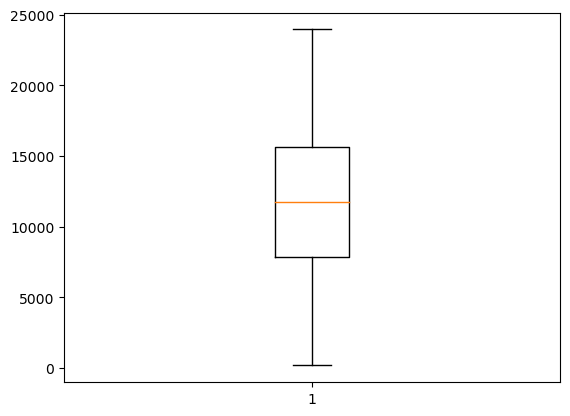

In [108]:
plt.boxplot(dr1_box['Purchase'])

In [109]:
dr1['P1'].kurtosis()

1.2347569716913842

In [110]:
dr1['P1'].skew()

1.0257349338538029

<Axes: >

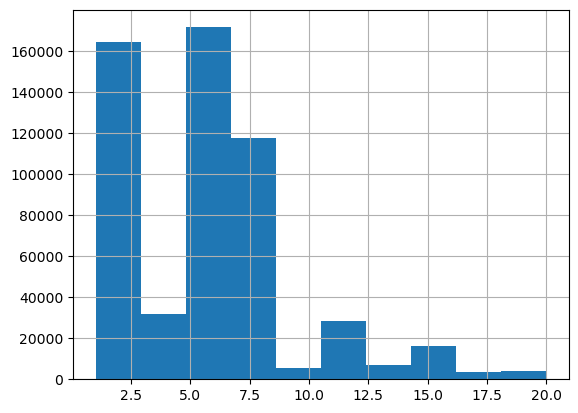

In [111]:
dr1['P1'].hist()

In [112]:
dr1_P1box=dr1['P1'].dropna()

{'whiskers': [<matplotlib.lines.Line2D at 0x27404000a90>,
 'caps': [<matplotlib.lines.Line2D at 0x27404001d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x27404000150>],
 'medians': [<matplotlib.lines.Line2D at 0x27404002cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27404001350>],
 'means': []}

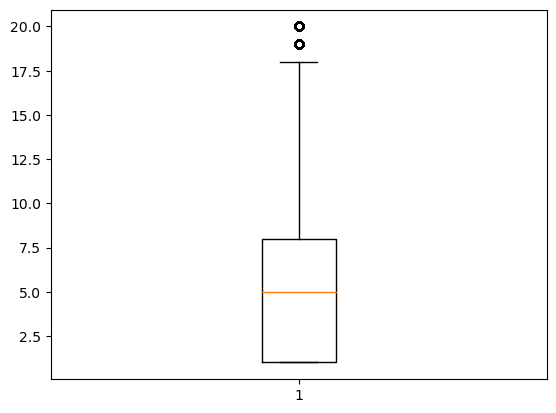

In [114]:
plt.boxplot(dr1_P1box)

In [115]:
dr1['P2'].kurtosis()

-1.4322668993429908

In [116]:
dr1['P2'].skew()

-0.1627577144156097

<Axes: >

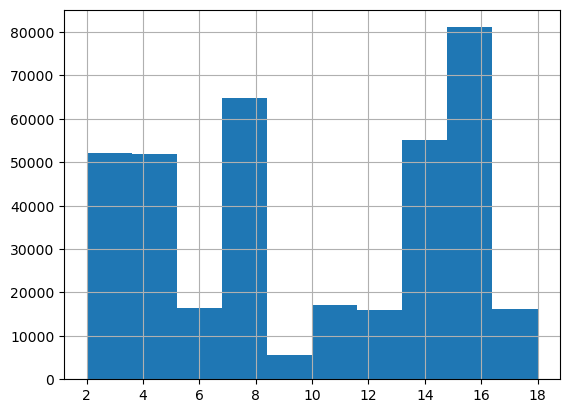

In [117]:
dr1['P2'].hist()

In [118]:
dr1.isnull().sum()

Gender                 0
Age                    0
Occupation             0
City_Category          0
City Years         84726
Marital_Status         0
P1                     0
P2                173638
P3                383247
Purchase               0
dtype: int64

In [119]:
dr1[dr1.isnull().any(axis=1)].head()

,Gender,Age,Occupation,City_Category,City Years,Marital_Status,P1,P2,P3,Purchase
Sr.No,,,,,,,,,,
1,F,Tin,10,A,2.0,0,3,NaN,NaN,8370
3,F,Tin,10,A,2.0,0,12,NaN,NaN,1422
4,F,Tin,10,A,2.0,0,12,14.0,NaN,1057
5,M,Old,16,C,NaN,0,8,NaN,NaN,7969
6,M,Adlt,15,A,3.0,0,1,2.0,NaN,15227


In [120]:
import seaborn as sns

<Axes: ylabel='Sr.No'>

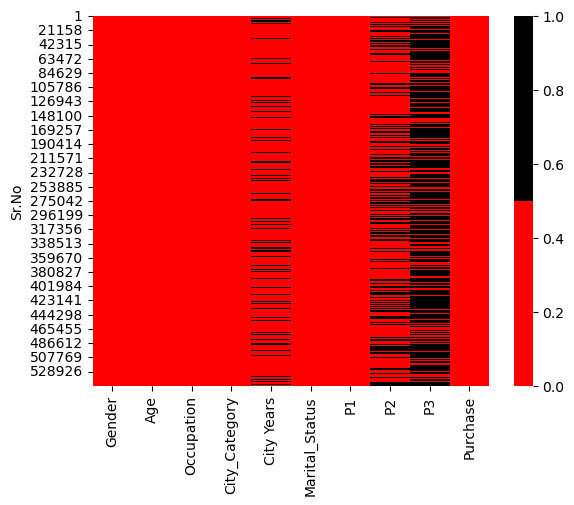

In [121]:
cols=dr1.columns
colours= ['Red','Black']
sns.heatmap(dr1[cols].isnull(),cmap=sns.color_palette(colours))

In [122]:
dr1.notnull().sum()

Gender            550068
Age               550068
Occupation        550068
City_Category     550068
City Years        465342
Marital_Status    550068
P1                550068
P2                376430
P3                166821
Purchase          550068
dtype: int64

In [123]:
med=dr1['P2'].median()
print(med)

9.0


In [124]:
dr1['P2']=dr1['P2'].fillna(med)
dr1.head()

,Gender,Age,Occupation,City_Category,City Years,Marital_Status,P1,P2,P3,Purchase
Sr.No,,,,,,,,,,
1,F,Tin,10,A,2.0,0,3,9.0,NaN,8370
2,F,Tin,10,A,2.0,0,1,6.0,14.0,15200
3,F,Tin,10,A,2.0,0,12,9.0,NaN,1422
4,F,Tin,10,A,2.0,0,12,14.0,NaN,1057
5,M,Old,16,C,NaN,0,8,9.0,NaN,7969


In [125]:
med1=dr1['P3'].median()
print(med1)

14.0


In [126]:
dr1['P3']=dr1['P3'].fillna(med1)
dr1.head()

,Gender,Age,Occupation,City_Category,City Years,Marital_Status,P1,P2,P3,Purchase
Sr.No,,,,,,,,,,
1,F,Tin,10,A,2.0,0,3,9.0,14.0,8370
2,F,Tin,10,A,2.0,0,1,6.0,14.0,15200
3,F,Tin,10,A,2.0,0,12,9.0,14.0,1422
4,F,Tin,10,A,2.0,0,12,14.0,14.0,1057
5,M,Old,16,C,NaN,0,8,9.0,14.0,7969


In [127]:
med2=dr1['City Years'].median()
print(med2)

1.0


In [128]:
dr1['City Years']=dr1['City Years'].fillna(med2)
dr1.head()

,Gender,Age,Occupation,City_Category,City Years,Marital_Status,P1,P2,P3,Purchase
Sr.No,,,,,,,,,,
1,F,Tin,10,A,2.0,0,3,9.0,14.0,8370
2,F,Tin,10,A,2.0,0,1,6.0,14.0,15200
3,F,Tin,10,A,2.0,0,12,9.0,14.0,1422
4,F,Tin,10,A,2.0,0,12,14.0,14.0,1057
5,M,Old,16,C,1.0,0,8,9.0,14.0,7969


In [129]:
dr1.isnull().sum()

Gender            0
Age               0
Occupation        0
City_Category     0
City Years        0
Marital_Status    0
P1                0
P2                0
P3                0
Purchase          0
dtype: int64

In [131]:
col1=dr1['P1']
col2=dr1['Purchase']
CoRelation = col1.corr(col2, method='pearson')
round(CoRelation, 1)

-0.3

In [132]:
col1=dr1['P2']
col2=dr1['Purchase']
CoRelation=col1.corr(col2,method='pearson')
round(CoRelation,1)

-0.2

In [133]:
col1=dr1['P3']
col2=dr1['Purchase']
Corelation=col1.corr(col2,method='pearson')
round(Corelation,1)

-0.1

C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


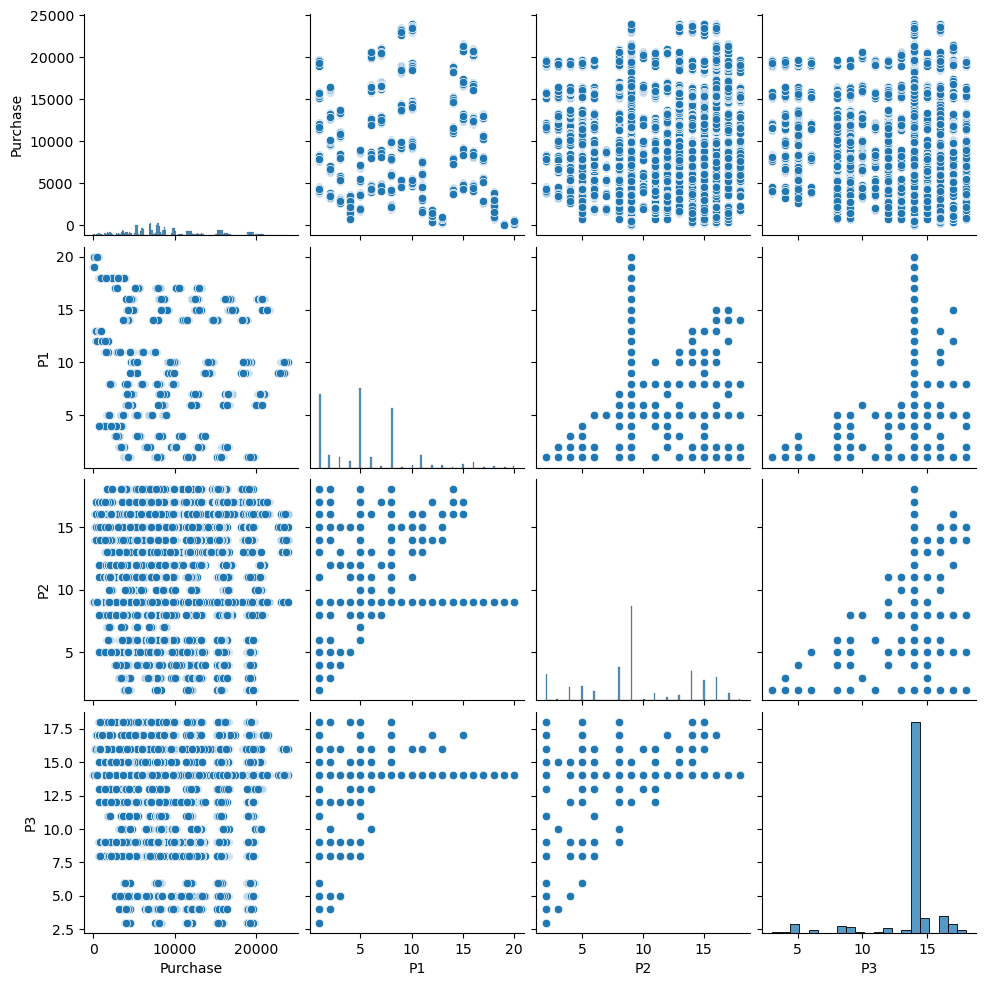

In [134]:
sr=['Purchase','P1','P2','P3']
sub_dr1=dr1[sr]
sns.pairplot(sub_dr1)

In [135]:
dr1

,Gender,Age,Occupation,City_Category,City Years,Marital_Status,P1,P2,P3,Purchase
Sr.No,,,,,,,,,,
1,F,Tin,10,A,2.0,0,3,9.0,14.0,8370
2,F,Tin,10,A,2.0,0,1,6.0,14.0,15200
3,F,Tin,10,A,2.0,0,12,9.0,14.0,1422
4,F,Tin,10,A,2.0,0,12,14.0,14.0,1057
5,M,Old,16,C,1.0,0,8,9.0,14.0,7969
...,...,...,...,...,...,...,...,...,...,...
550064,M,Old,13,B,1.0,1,20,9.0,14.0,368
550065,F,Adlt,1,C,3.0,0,20,9.0,14.0,371
550066,F,Adlt,15,B,1.0,1,20,9.0,14.0,137


In [139]:
dr2=pd.get_dummies(dr1,columns=['Age'],dtype=int)
dr2.head()

,Gender,Occupation,City_Category,City Years,Marital_Status,P1,P2,P3,Purchase,Age_Adlt,Age_Midage,Age_Old,Age_Tin
Sr.No,,,,,,,,,,,,,
1,F,10,A,2.0,0,3,9.0,14.0,8370,0,0,0,1
2,F,10,A,2.0,0,1,6.0,14.0,15200,0,0,0,1
3,F,10,A,2.0,0,12,9.0,14.0,1422,0,0,0,1
4,F,10,A,2.0,0,12,14.0,14.0,1057,0,0,0,1
5,M,16,C,1.0,0,8,9.0,14.0,7969,0,0,1,0
